# Laboratorium 4

Filtry

Martyna Toborek 311843

In [17]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Zad 1

w tym zadaniu należało wygenergować zaszumiony sygnał sinusoidalny, a następnie przefiltrować go fitlrami FIR i IIR górno-, dolno- i pasmowoprzepustowymi, oraz wyznaczyć Signal-to-Noise ratio. 

W poniższej komórce została zdefiniowana funkcja do wyznaczania SNR.

In [18]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

Poniżej został zdefiniowany sygnał sinusoidalny zaszumiony.  

In [19]:
N=2000
A=5
f=5
fs=1000
dt=1/fs
t=dt*np.arange(N)

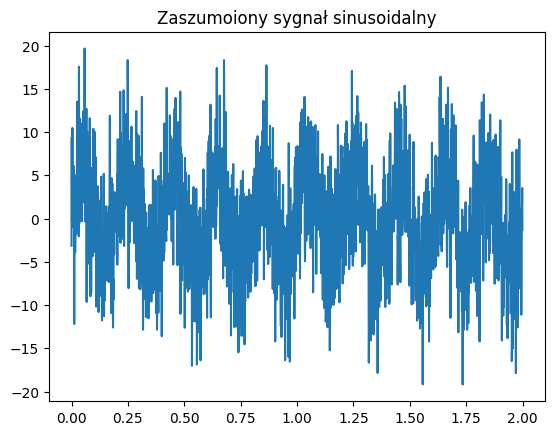

SNR: -0.005112434397744959


In [20]:
sin_szum=A*np.sin(2*np.pi*f*t) + A*np.random.randn(N) 
fig, ax = plt.subplots()
ax.plot(t,sin_szum)
ax.set_title("Zaszumoiony sygnał sinusoidalny")
plt.show()
print("SNR: " + str(signaltonoise(sin_szum)))

<function matplotlib.pyplot.show(close=None, block=None)>

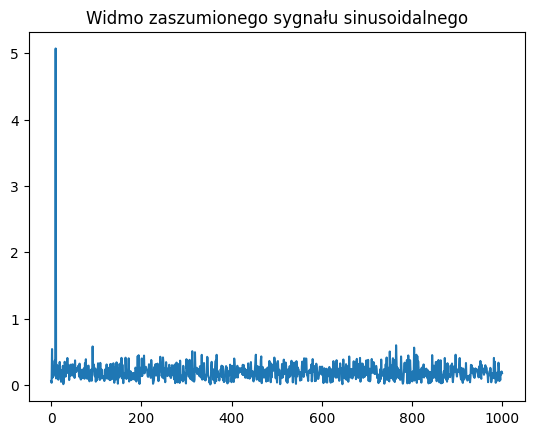

In [21]:
widmo_sin = np.abs(np.fft.rfft(sin_szum))/ 1024

fig, ax = plt.subplots()
ax.plot(widmo_sin)
ax.set_title("Widmo zaszumionego sygnału sinusoidalnego")
plt.show

Definiujemy filtry IIR.

dp - dolnoprzepustowy

gp - górnoprzepustowy

pp - pasmowoprzepustowy

In [22]:
dp_IIR = sig.iirfilter(8, 10 / (fs / 2),btype='lowpass', output='sos')
gp_IIR = sig.iirfilter(8, 10 / (fs / 2),btype='highpass', output='sos')
pp_IIR = sig.iirfilter(8, (1/(fs/2),7 / (fs / 2)),btype='bandpass', output='sos')

Definiujemy filtry FIR.

In [23]:
dp_FIR = sig.firwin(100, 100, fs=fs)
gp_FIR = sig.firwin(101, 10, pass_zero=False, fs=fs)
pp_FIR = sig.firwin(100, (3, 8), pass_zero=False, fs=fs)

Poniżej zostały przedstawione sygnały: oryginalny, po przepuszczeniu przez filtr FIR i po przepuszczeniu przez filtr IIR dolnoprzepustowe:

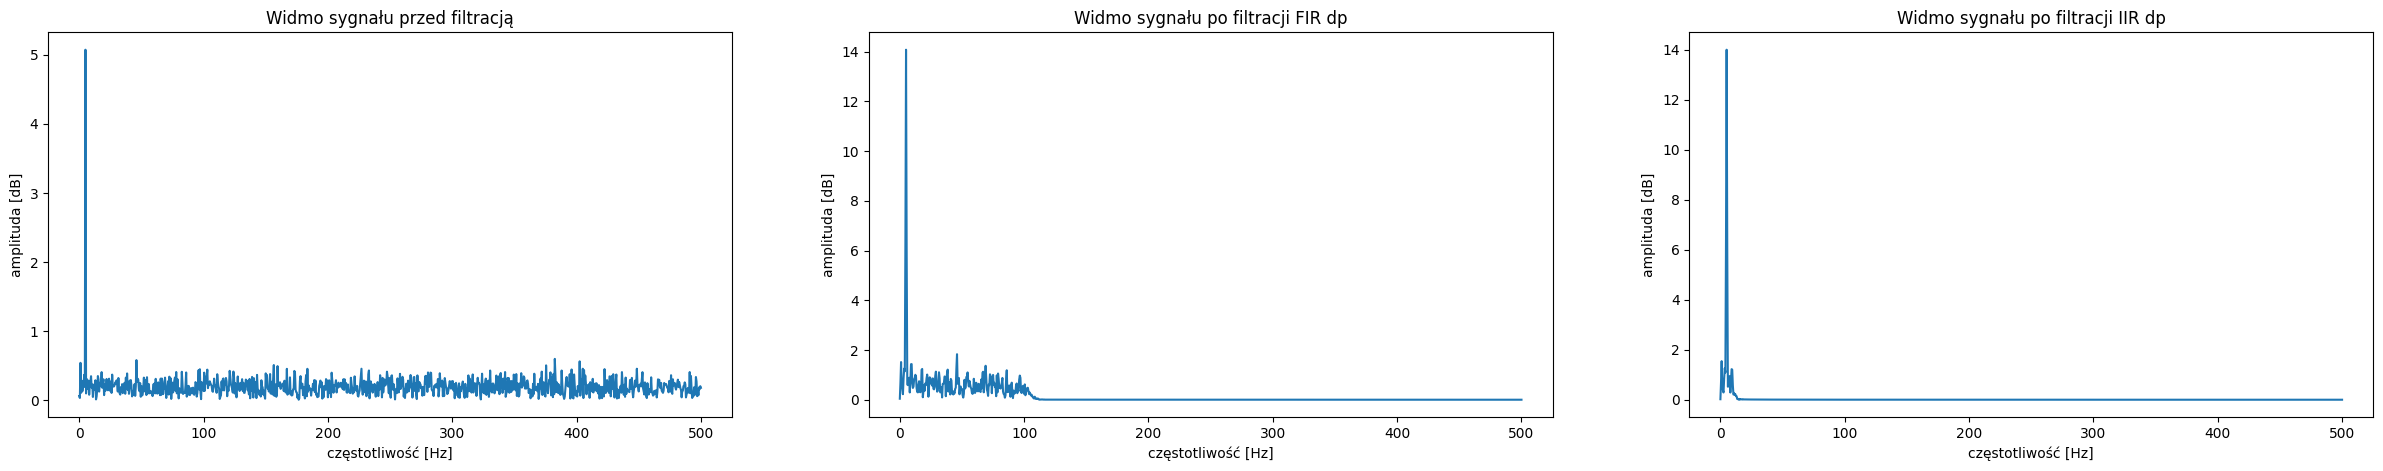

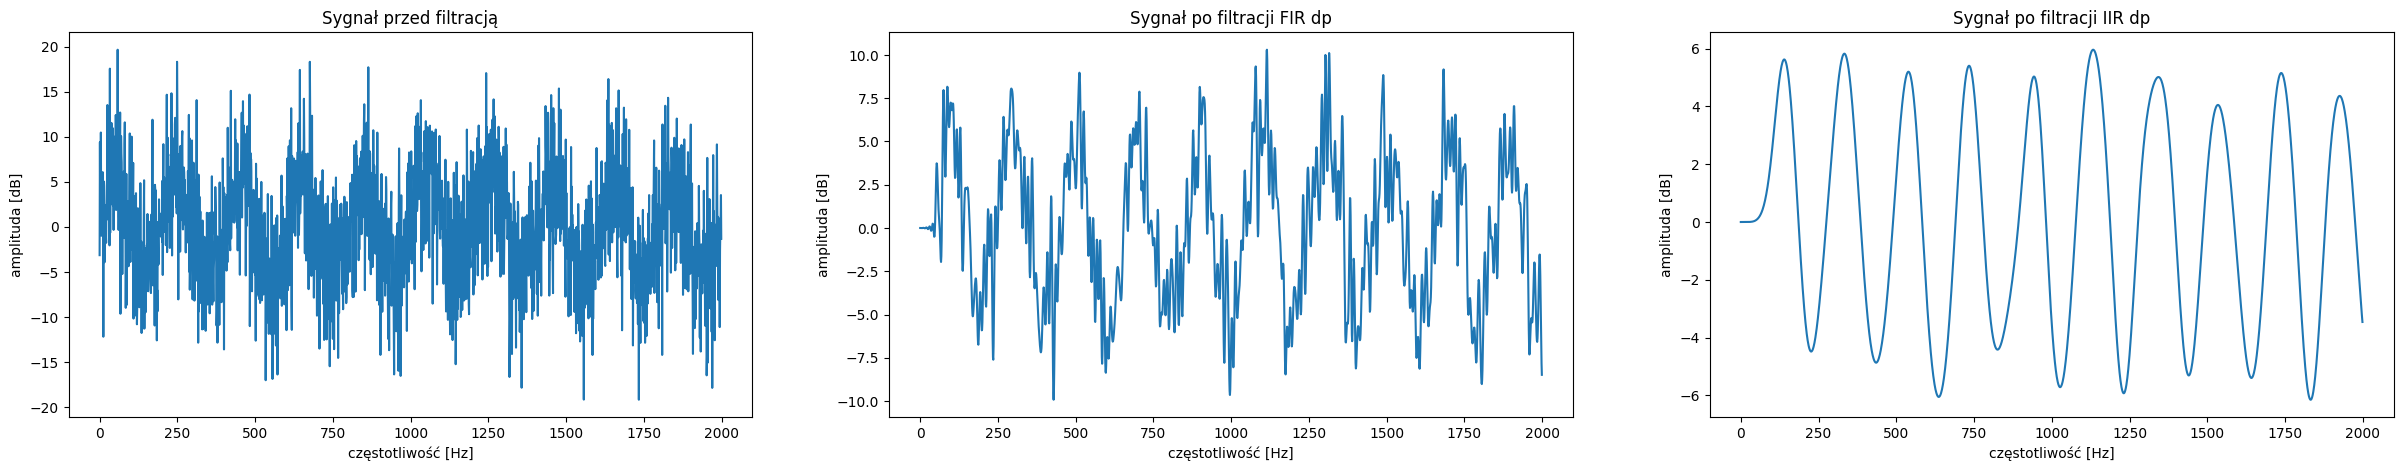

SNR dla FIR: 0.012359938739612072
SNR dla IRR: 0.036281242358857345


In [24]:
sin_FIR_dp = sig.lfilter(dp_FIR, 1, sin_szum)
widmo_FIR_dp = 20 * np.abs(np.fft.rfft(sin_FIR_dp * np.hamming(N))) / N/2
f1 = np.fft.rfftfreq(N, 1 / fs)

sin_IIR_dp = sig.sosfilt(dp_IIR, sin_szum)
widmo_IIR_dp = 20 * np.abs(np.fft.rfft(sin_IIR_dp * np.hamming(N))) / N/2

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(f1, widmo_sin, label='oryginalny')
ax[0].set_xlabel('częstotliwość [Hz]')
ax[0].set_ylabel('amplituda [dB]')
ax[0].set_title('Widmo sygnału przed filtracją')

ax[1].plot(f1, widmo_FIR_dp, label='po filtracji')
ax[1].set_xlabel('częstotliwość [Hz]')
ax[1].set_ylabel('amplituda [dB]')
ax[1].set_title('Widmo sygnału po filtracji FIR dp')

ax[2].plot(f1, widmo_IIR_dp, label='po filtracji')
ax[2].set_xlabel('częstotliwość [Hz]')
ax[2].set_ylabel('amplituda [dB]')
ax[2].set_title('Widmo sygnału po filtracji IIR dp')

plt.show()

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(sin_szum, label='oryginalny')
ax[0].set_xlabel('częstotliwość [Hz]')
ax[0].set_ylabel('amplituda [dB]')
ax[0].set_title('Sygnał przed filtracją')

ax[1].plot(sin_FIR_dp, label='po filtracji')
ax[1].set_xlabel('częstotliwość [Hz]')
ax[1].set_ylabel('amplituda [dB]')
ax[1].set_title('Sygnał po filtracji FIR dp')

ax[2].plot(sin_IIR_dp, label='po filtracji')
ax[2].set_xlabel('częstotliwość [Hz]')
ax[2].set_ylabel('amplituda [dB]')
ax[2].set_title('Sygnał po filtracji IIR dp')

plt.show()
print("SNR dla FIR: " + str(signaltonoise(sin_FIR_dp)))
print("SNR dla IRR: " + str(signaltonoise(sin_IIR_dp)))

Zauważamy, że po przepuszczeniu sygnału przez filtry dostajemy coraz czystsze sygnały sinusoidalne: po przepuszczeniu przez filtr IIR sygnał jest czystszy od szumów.

Możemy też zauważyć delikatne przesunięcię na osi częstotliwości, co może być spowodowane opóźnieniem filtrów.

Poniżej zostały przedstawione sygnały: oryginalny, po przepuszczeniu przez filtr FIR i po przepuszczeniu przez filtr IIR górnoprzepustowe:

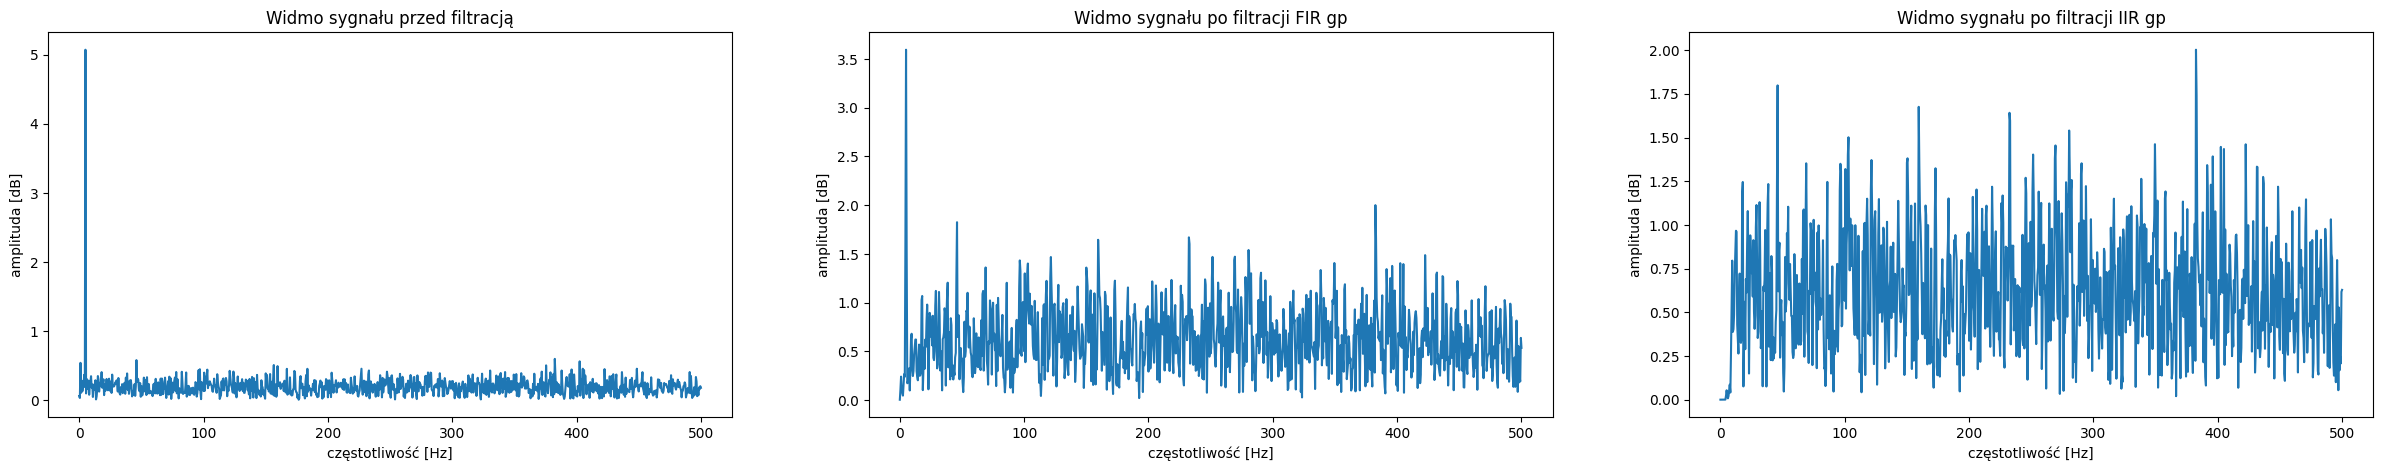

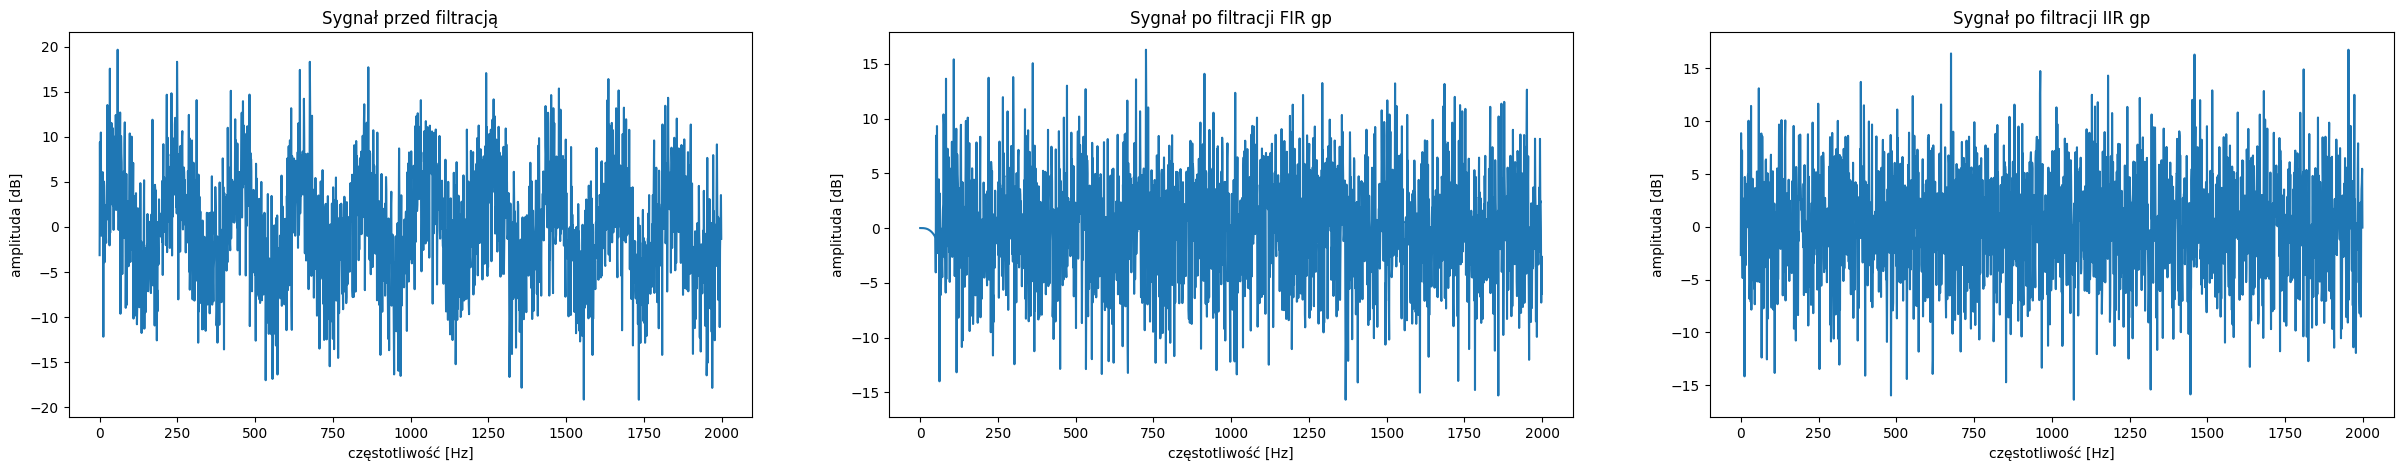

SNR dla FIR: 0.0022604840443220336
SNR dla IRR: -0.0002433646103769733


In [25]:
sin_FIR_gp = sig.lfilter(gp_FIR, 1, sin_szum)
widmo_FIR_gp = 20 * np.abs(np.fft.rfft(sin_FIR_gp * np.hamming(N))) / N/2

sin_IIR_gp = sig.sosfilt(gp_IIR, sin_szum)
widmo_IIR_gp = 20 * np.abs(np.fft.rfft(sin_IIR_gp * np.hamming(N))) / N/2

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(f1, widmo_sin, label='oryginalny')
ax[0].set_xlabel('częstotliwość [Hz]')
ax[0].set_ylabel('amplituda [dB]')
ax[0].set_title('Widmo sygnału przed filtracją')

ax[1].plot(f1, widmo_FIR_gp, label='po filtracji')
ax[1].set_xlabel('częstotliwość [Hz]')
ax[1].set_ylabel('amplituda [dB]')
ax[1].set_title('Widmo sygnału po filtracji FIR gp')

ax[2].plot(f1, widmo_IIR_gp, label='po filtracji')
ax[2].set_xlabel('częstotliwość [Hz]')
ax[2].set_ylabel('amplituda [dB]')
ax[2].set_title('Widmo sygnału po filtracji IIR gp')

plt.show()

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(sin_szum, label='oryginalny')
ax[0].set_xlabel('częstotliwość [Hz]')
ax[0].set_ylabel('amplituda [dB]')
ax[0].set_title('Sygnał przed filtracją')

ax[1].plot(sin_FIR_gp, label='po filtracji')
ax[1].set_xlabel('częstotliwość [Hz]')
ax[1].set_ylabel('amplituda [dB]')
ax[1].set_title('Sygnał po filtracji FIR gp')

ax[2].plot(sin_IIR_gp, label='po filtracji')
ax[2].set_xlabel('częstotliwość [Hz]')
ax[2].set_ylabel('amplituda [dB]')
ax[2].set_title('Sygnał po filtracji IIR gp')

plt.show()
print("SNR dla FIR: " + str(signaltonoise(sin_FIR_gp)))
print("SNR dla IRR: " + str(signaltonoise(sin_IIR_gp)))

Zauważmamy, że po przepuszczeniu przez filtry sygnał wygląda na bardziej zaszumiony, można nawet stwierdzić, że otrzymujemy tylko szum, a sygnał sinusoidalny został całkiem wycięty. 

Poniżej zostały przedstawione sygnały: oryginalny, po przepuszczeniu przez filtr FIR i po przepuszczeniu przez filtr IIR pasmowoprzepustowe:

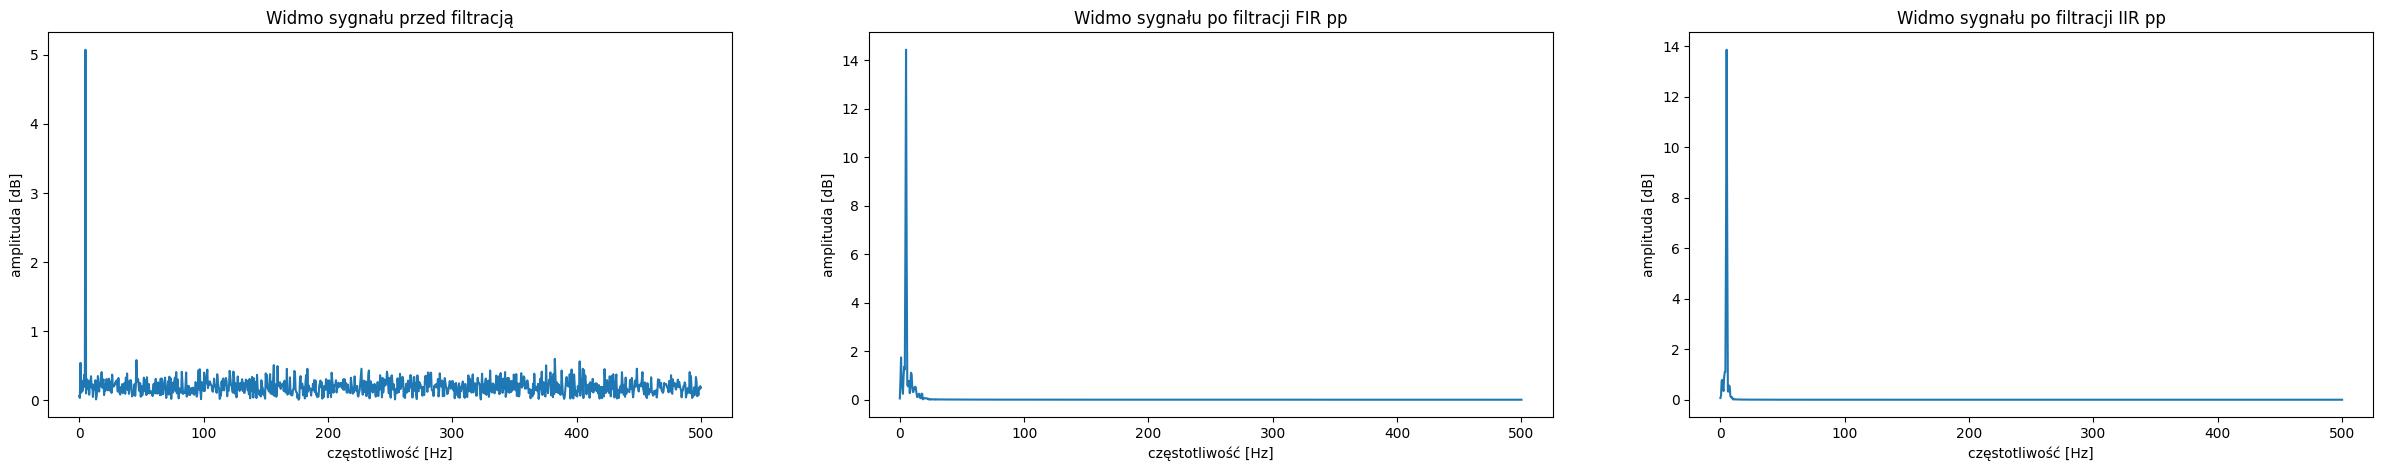

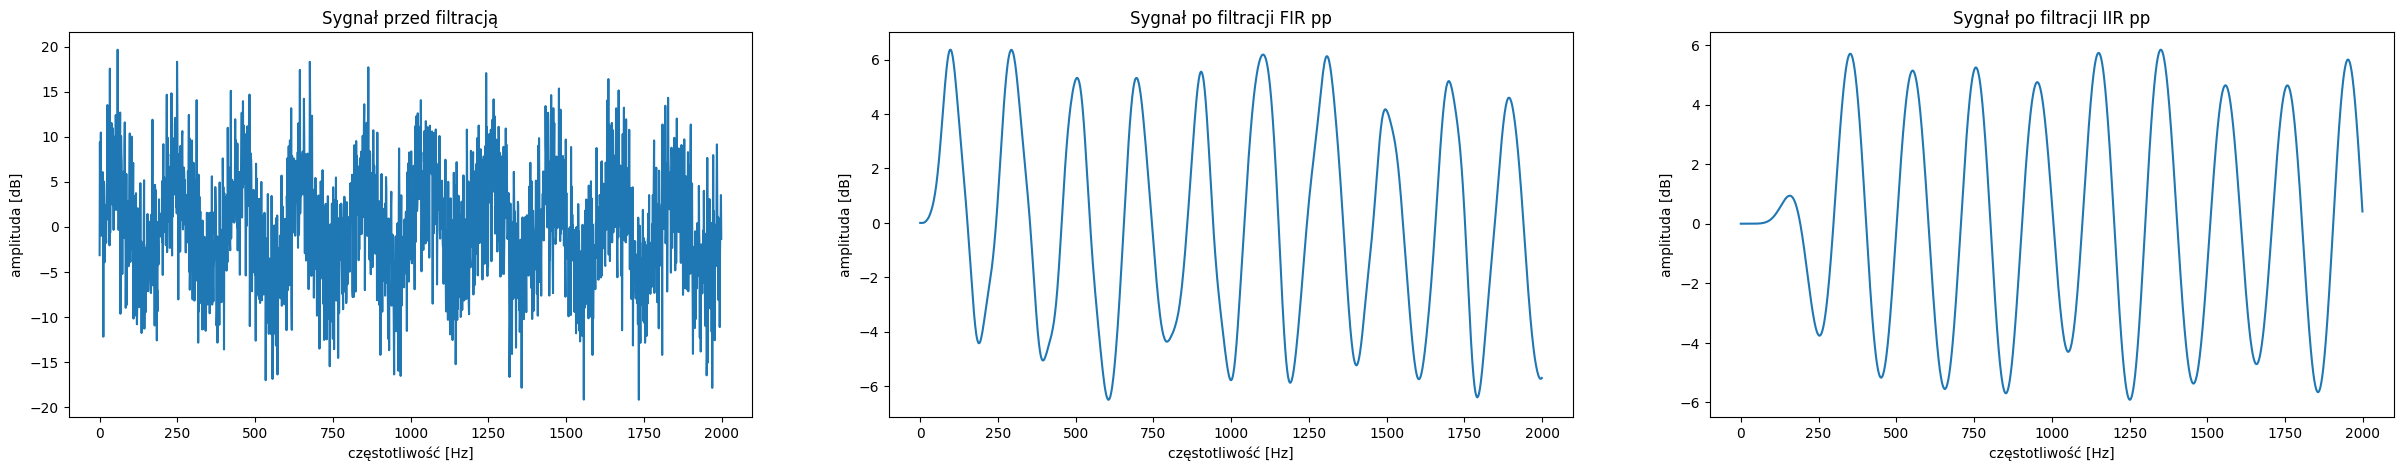

SNR dla FIR: 0.014566540704895669
SNR dla IRR: 0.015764004717990616


In [26]:
sin_FIR_pp = sig.lfilter(pp_FIR, 1, sin_szum)
widmo_FIR_pp = 20 * np.abs(np.fft.rfft(sin_FIR_pp * np.hamming(N))) / N/2

sin_IIR_pp = sig.sosfilt(pp_IIR, sin_szum)
widmo_IIR_pp = 20 * np.abs(np.fft.rfft(sin_IIR_pp * np.hamming(N))) / N/2

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(f1, widmo_sin, label='oryginalny')
ax[0].set_xlabel('częstotliwość [Hz]')
ax[0].set_ylabel('amplituda [dB]')
ax[0].set_title('Widmo sygnału przed filtracją')

ax[1].plot(f1, widmo_FIR_pp, label='po filtracji')
ax[1].set_xlabel('częstotliwość [Hz]')
ax[1].set_ylabel('amplituda [dB]')
ax[1].set_title('Widmo sygnału po filtracji FIR pp')

ax[2].plot(f1, widmo_IIR_pp, label='po filtracji')
ax[2].set_xlabel('częstotliwość [Hz]')
ax[2].set_ylabel('amplituda [dB]')
ax[2].set_title('Widmo sygnału po filtracji IIR pp')

plt.show()

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(sin_szum, label='oryginalny')
ax[0].set_xlabel('częstotliwość [Hz]')
ax[0].set_ylabel('amplituda [dB]')
ax[0].set_title('Sygnał przed filtracją')

ax[1].plot(sin_FIR_pp, label='po filtracji')
ax[1].set_xlabel('częstotliwość [Hz]')
ax[1].set_ylabel('amplituda [dB]')
ax[1].set_title('Sygnał po filtracji FIR pp')

ax[2].plot(sin_IIR_pp, label='po filtracji')
ax[2].set_xlabel('częstotliwość [Hz]')
ax[2].set_ylabel('amplituda [dB]')
ax[2].set_title('Sygnał po filtracji IIR pp')

plt.show()

print("SNR dla FIR: " + str(signaltonoise(sin_FIR_pp)))
print("SNR dla IRR: " + str(signaltonoise(sin_IIR_pp)))

Zauważamy, że sygnał po przejściu przez filtry jest czystszym sygnałem sinusoidalnym. Jesteśmy też w stanie zauważyć, że sygnał powstały po przejściu przez filtr IIR jest bardziej wymetryczny względem wartości 0 na osi Y. 
Zauważamy także przesuniecie w osi X, w przypadku filtru FIR mniejsze niż występujące przy filtrze IIR.  

# Zad 2

W tym zadaniu należało zdefiniować sygnał będący sumą dwóch sygnałów sinusoidalnych, a następnie zastosować takie filtry, aby otrzymać każdy z sygnałów składowych sygnałów osobno.

W poniższych komórkach został zdefiniowany sygnał początkowy.
Na wykresach zostały przedstawione sygnały: składowe, początkowy oraz ich widma.  

In [27]:
N2=2000
A2=5
f1=5
f2=50
fs2=1000
dt2=1/fs2
t2=dt2*np.arange(N2)

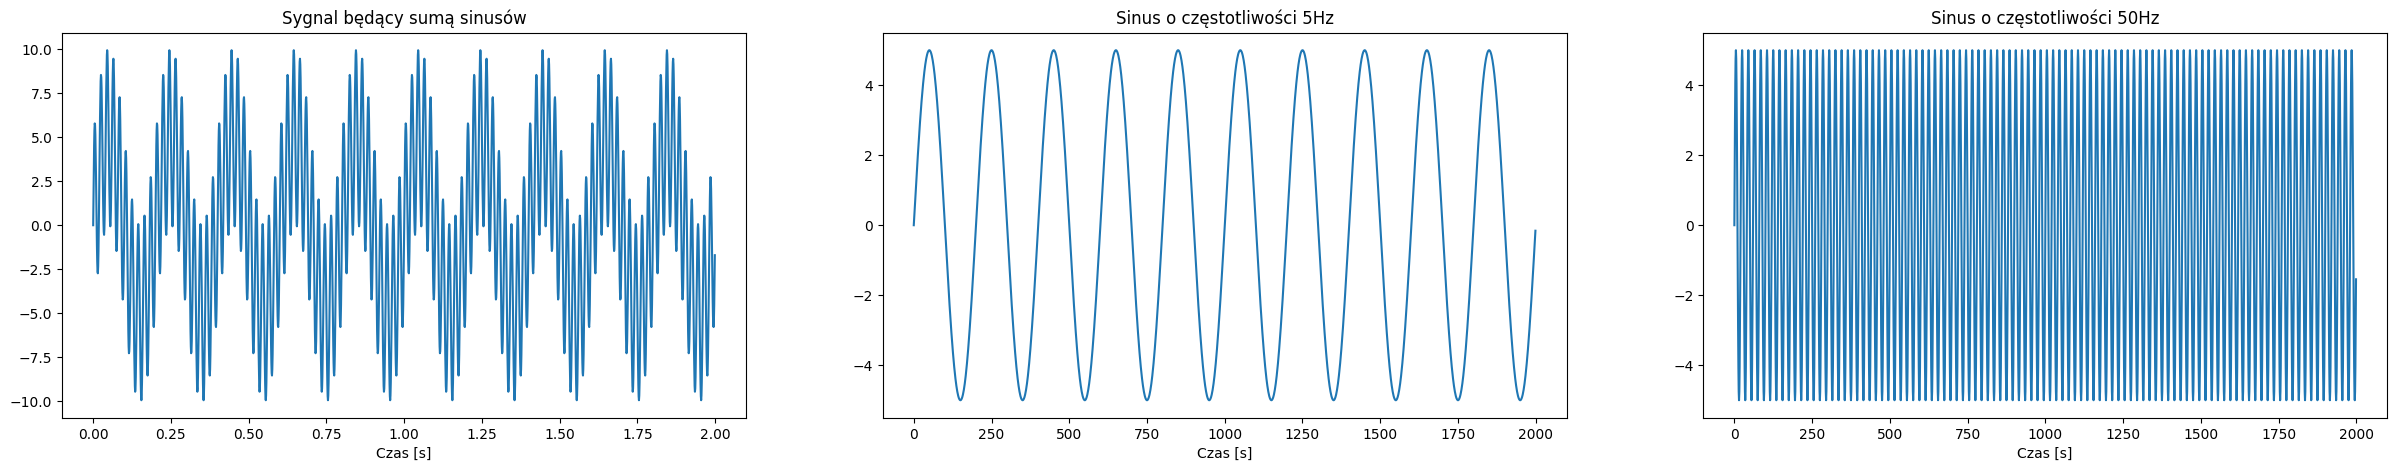

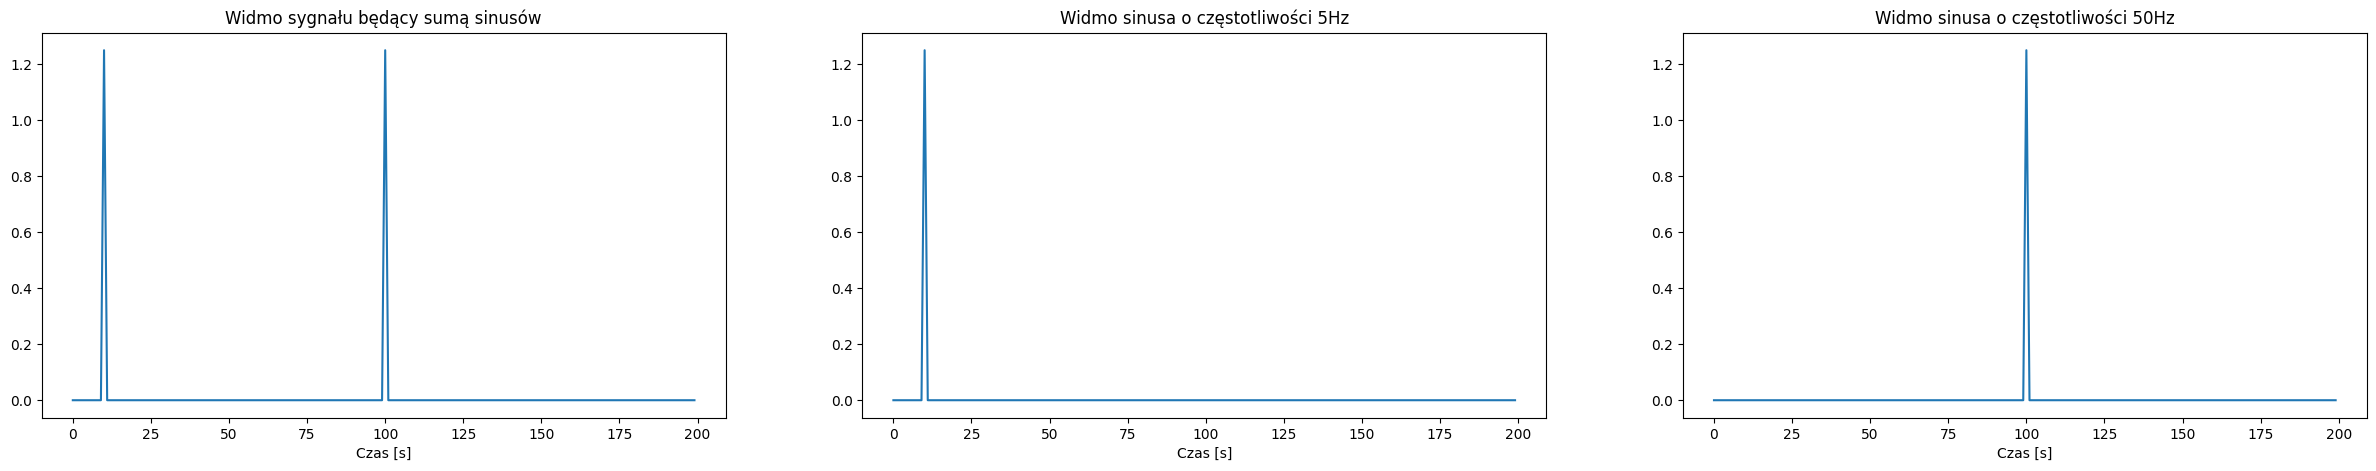

In [28]:
sin1 = A2*np.sin(2 * np.pi * f1 * t2)
sin2 = A2*np.sin(2 * np.pi * f2 * t2)
sin_sum = sin1+sin2

widmo_sin_sum = np.abs(np.fft.rfft(sin_sum))/ N2/2
widmo_sin1 = np.abs(np.fft.rfft(sin1))/ N2/2
widmo_sin2 = np.abs(np.fft.rfft(sin2))/ N2/2

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(t,sin_sum)
ax[0].set_title("Sygnal będący sumą sinusów")
ax[0].set_xlabel("Czas [s]")

ax[1].plot(sin1)
ax[1].set_title("Sinus o częstotliwości 5Hz")
ax[1].set_xlabel("Czas [s]")

ax[2].plot(sin2)
ax[2].set_title("Sinus o częstotliwości 50Hz")
ax[2].set_xlabel("Czas [s]")

plt.show()

fig, ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(widmo_sin_sum[0:200])
ax[0].set_title("Widmo sygnału będący sumą sinusów")
ax[0].set_xlabel("Czas [s]")

ax[1].plot(widmo_sin1[0:200])
ax[1].set_title("Widmo sinusa o częstotliwości 5Hz")
ax[1].set_xlabel("Czas [s]")

ax[2].plot(widmo_sin2[0:200])
ax[2].set_title("Widmo sinusa o częstotliwości 50Hz")
ax[2].set_xlabel("Czas [s]")

plt.show()


Do zniwelowania sygnału o częstotliwości 50 Hz zastosowałam filtr dolnoprzepustowy FIR o długości 25Hz. 

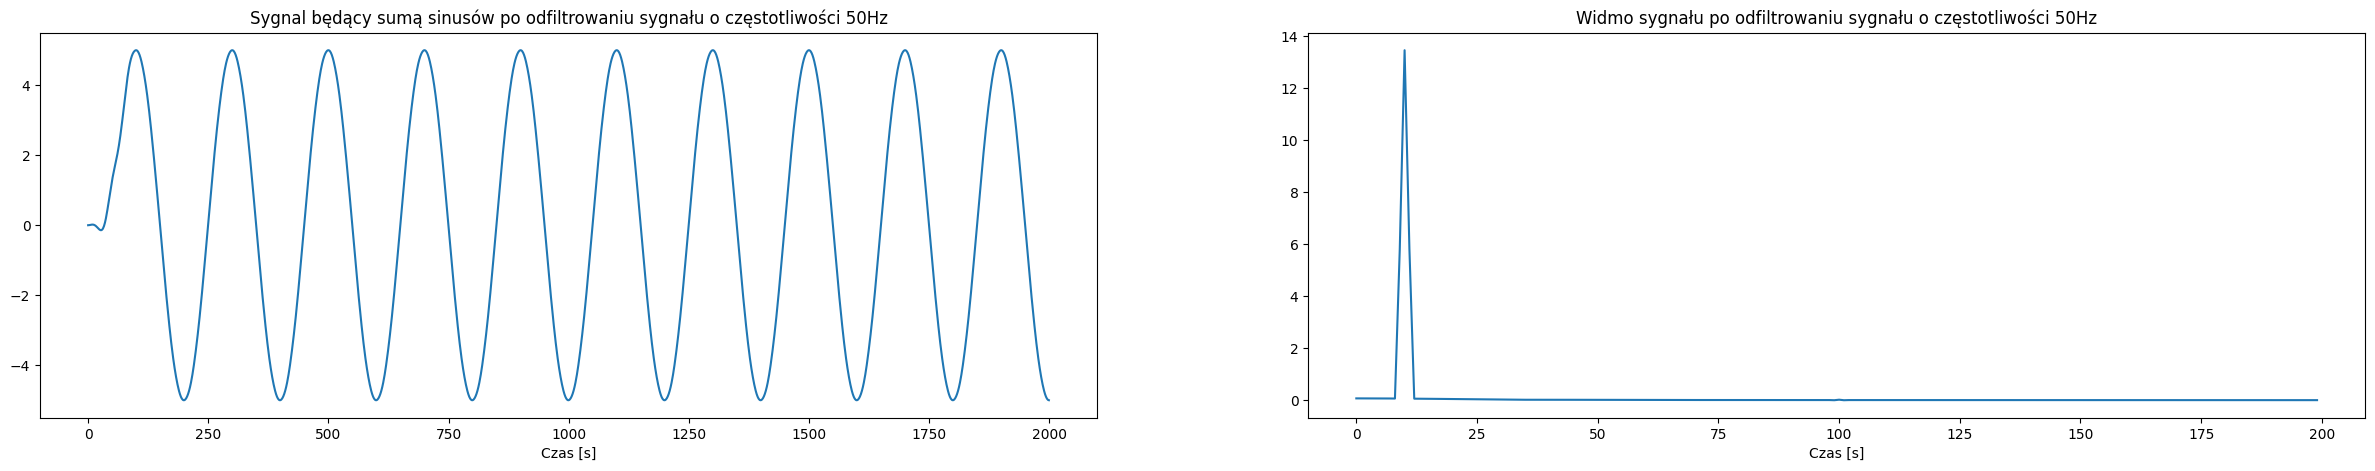

In [29]:
dp_25 = sig.firwin(100, 25, fs=fs2)
sin_sum_5 = sig.lfilter(dp_25, 1, sin_sum)
widmo_sin_sum_5 = 20 *(np.abs(np.fft.rfft(sin_sum_5 * np.hamming(N2))) / N2/2)


fig, ax = plt.subplots(1,2,figsize=(30,5))
ax[0].plot(sin_sum_5)
ax[0].set_title("Sygnal będący sumą sinusów po odfiltrowaniu sygnału o częstotliwości 50Hz")
ax[0].set_xlabel("Czas [s]")

ax[1].plot(widmo_sin_sum_5[0:200])
ax[1].set_title("Widmo sygnału po odfiltrowaniu sygnału o częstotliwości 50Hz")
ax[1].set_xlabel("Czas [s]")

plt.show()

Do zniwelowania sygnału o częstotliwości 5 Hz zastosowałam filtr górnoprzepustowy FIR o częstotliwości granicznej 45Hz.  . 

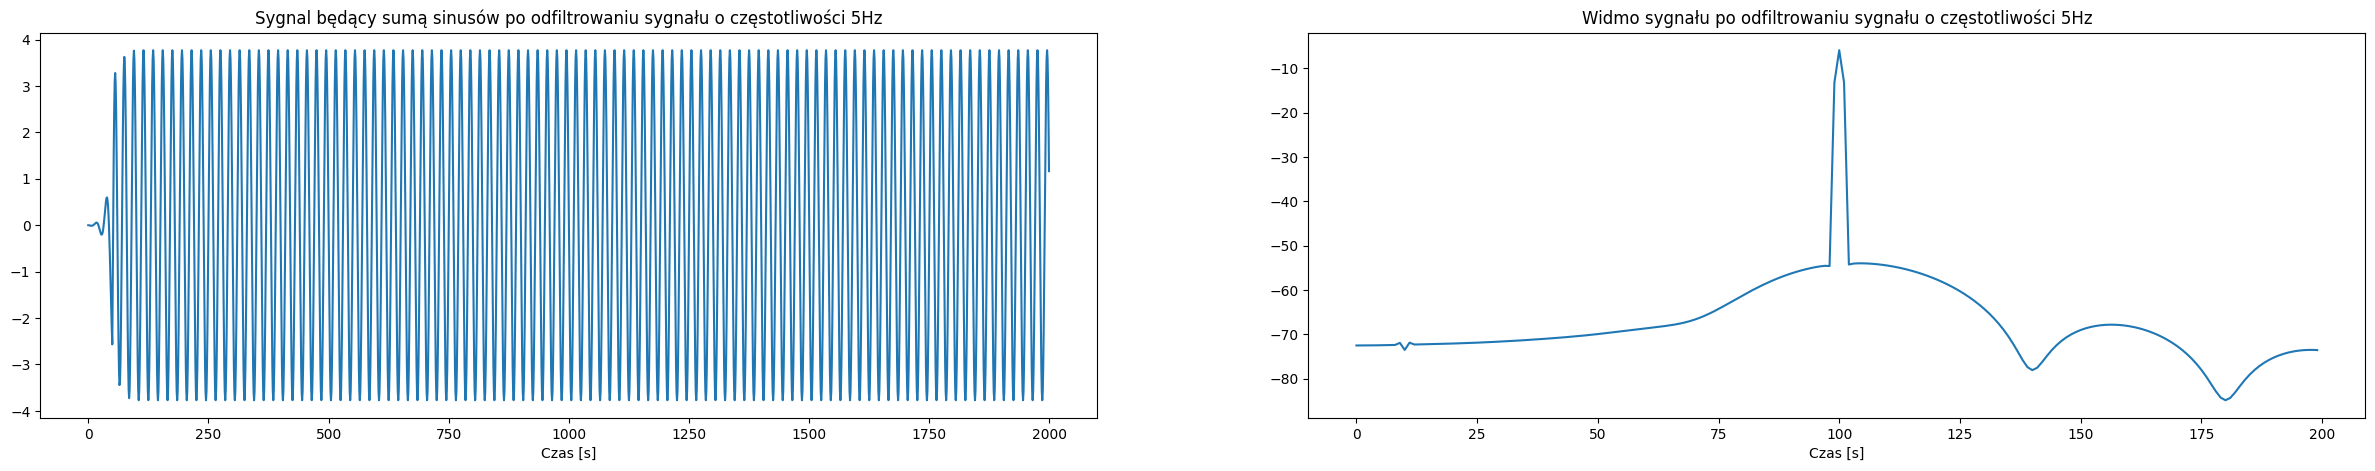

In [30]:
gp = sig.firwin(101, 45, pass_zero=False, fs=fs2)
sin_sum_50 = sig.lfilter(gp, 1, sin_sum)
widmo_sin_sum_50 = 20 * np.log10(np.abs(np.fft.rfft(sin_sum_50 * np.hamming(N2))) / N2/2)


fig, ax = plt.subplots(1,2,figsize=(30,5))
ax[0].plot(sin_sum_50)
ax[0].set_title("Sygnal będący sumą sinusów po odfiltrowaniu sygnału o częstotliwości 5Hz")
ax[0].set_xlabel("Czas [s]")

ax[1].plot(widmo_sin_sum_50[0:200])
ax[1].set_title("Widmo sygnału po odfiltrowaniu sygnału o częstotliwości 5Hz")
ax[1].set_xlabel("Czas [s]")

plt.show()

# Zad 3

W tym zadaniu należało wczytać sygnał z pliku ecg.mat, a następnie przepuścić odczytany sygnał przez filtr tak, aby usunąć falowania linii bazowej oraz zakłócenia sieci elektrycznej.

In [41]:
mat = loadmat('ecg.mat')['ecg'][:,0]
fs_mat=500


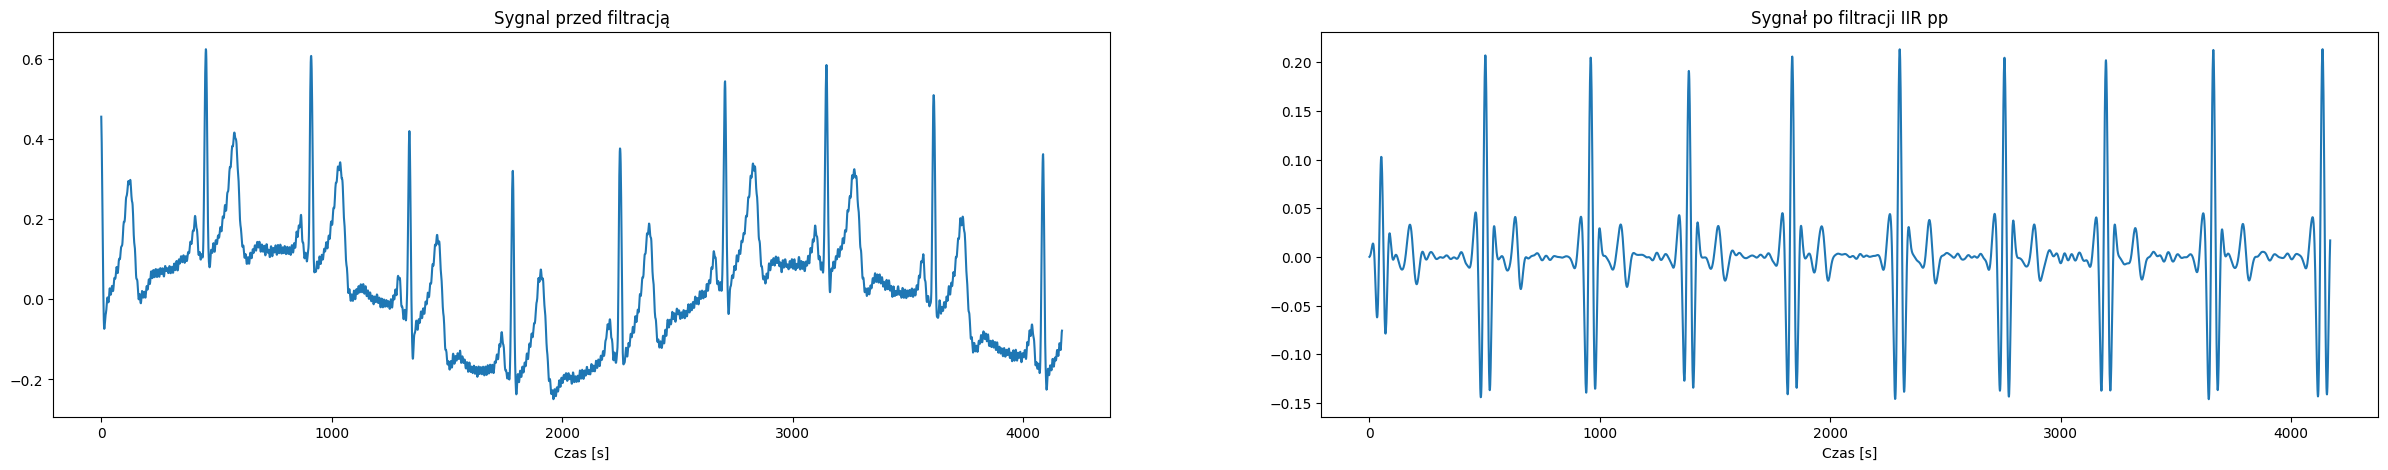

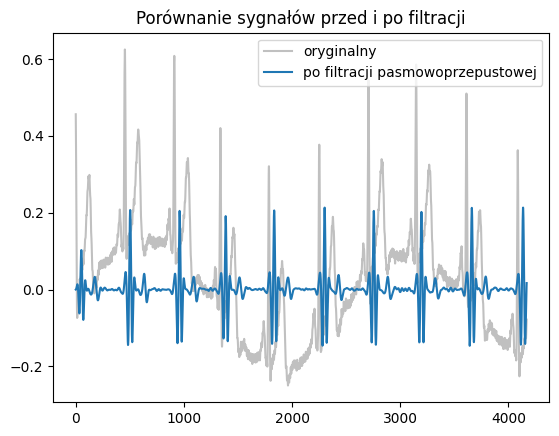

In [42]:
pp_ecg_FIR = sig.firwin(100, (10, 15), window=("hamming"), pass_zero=False, fs=fs_mat)
mat_pp_FIR = sig.lfilter(pp_ecg_FIR, 1, mat)

fig, ax = plt.subplots(1,2,figsize=(30,5))
ax[0].plot(mat)
ax[0].set_title("Sygnal przed filtracją")
ax[0].set_xlabel("Czas [s]")

ax[1].plot(mat_pp_FIR)
ax[1].set_title("Sygnał po filtracji IIR pp")
ax[1].set_xlabel("Czas [s]")

plt.show()

plt.plot(mat, '#c0c0c0', label='oryginalny')
plt.plot(mat_pp_FIR, label='po filtracji pasmowoprzepustowej')
plt.title("Porównanie sygnałów przed i po filtracji")
plt.legend()
plt.show()